In [356]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [357]:
transactions = pd.read_excel('KPMG.xlsx', 'Transactions')
transactions.head()

,Note: The data and information in this document is reflective of a hypothetical situation and client. This document is to be used for KPMG Virtual Internship purposes only.,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12
0,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
1,1,2,2950,2017-02-25 00:00:00,False,Approved,Solex,Standard,medium,medium,71.49,53.62,41245
2,2,3,3120,2017-05-21 00:00:00,True,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701
3,3,37,402,2017-10-16 00:00:00,False,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361
4,4,88,3135,2017-08-31 00:00:00,False,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.1,36145


In [358]:
#making first row as header
transactions.columns = transactions.iloc[0]
transactions = transactions[1:]
transactions.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
1,1,2,2950,2017-02-25 00:00:00,False,Approved,Solex,Standard,medium,medium,71.49,53.62,41245
2,2,3,3120,2017-05-21 00:00:00,True,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701
3,3,37,402,2017-10-16 00:00:00,False,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361
4,4,88,3135,2017-08-31 00:00:00,False,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.1,36145
5,5,78,787,2017-10-01 00:00:00,True,Approved,Giant Bicycles,Standard,medium,large,1765.3,709.48,42226


In [359]:
transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 1 to 20000
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   transaction_id           20000 non-null  object
 1   product_id               20000 non-null  object
 2   customer_id              20000 non-null  object
 3   transaction_date         20000 non-null  object
 4   online_order             19640 non-null  object
 5   order_status             20000 non-null  object
 6   brand                    19803 non-null  object
 7   product_line             19803 non-null  object
 8   product_class            19803 non-null  object
 9   product_size             19803 non-null  object
 10  list_price               20000 non-null  object
 11  standard_cost            19803 non-null  object
 12  product_first_sold_date  19803 non-null  object
dtypes: object(13)
memory usage: 2.0+ MB


In [360]:
transactions.isnull().sum()

0
transaction_id               0
product_id                   0
customer_id                  0
transaction_date             0
online_order               360
order_status                 0
brand                      197
product_line               197
product_class              197
product_size               197
list_price                   0
standard_cost              197
product_first_sold_date    197
dtype: int64

In [361]:
#remove null values
trans = transactions.dropna()

In [362]:
trans.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19445 entries, 1 to 20000
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   transaction_id           19445 non-null  object
 1   product_id               19445 non-null  object
 2   customer_id              19445 non-null  object
 3   transaction_date         19445 non-null  object
 4   online_order             19445 non-null  object
 5   order_status             19445 non-null  object
 6   brand                    19445 non-null  object
 7   product_line             19445 non-null  object
 8   product_class            19445 non-null  object
 9   product_size             19445 non-null  object
 10  list_price               19445 non-null  object
 11  standard_cost            19445 non-null  object
 12  product_first_sold_date  19445 non-null  object
dtypes: object(13)
memory usage: 2.1+ MB


In [363]:
trans.columns

Index(['transaction_id', 'product_id', 'customer_id', 'transaction_date',
       'online_order', 'order_status', 'brand', 'product_line',
       'product_class', 'product_size', 'list_price', 'standard_cost',
       'product_first_sold_date'],
      dtype='object', name=0)

In [364]:
#checking for inconsistencies in column values.
trans['online_order'].unique()

array([False, True], dtype=object)

In [365]:
trans['order_status'].unique()

array(['Approved', 'Cancelled'], dtype=object)

In [366]:
trans['product_size'].unique()

array(['medium', 'large', 'small'], dtype=object)

In [367]:
cust_demo = pd.read_excel("KPMG.xlsx", 'CustomerDemographic')
cust_demo.head()

,Note: The data and information in this document is reflective of a hypothetical situation and client. This document is to be used for KPMG Virtual Internship purposes only.,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12
0,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure
1,1,Laraine,Medendorp,F,93,1953-10-12 00:00:00,Executive Secretary,Health,Mass Customer,N,"""'",Yes,11
2,2,Eli,Bockman,Male,81,1980-12-16 00:00:00,Administrative Officer,Financial Services,Mass Customer,N,<script>alert('hi')</script>,Yes,16
3,3,Arlin,Dearle,Male,61,1954-01-20 00:00:00,Recruiting Manager,Property,Mass Customer,N,2018-02-01 00:00:00,Yes,15
4,4,Talbot,NaN,Male,33,1961-10-03 00:00:00,NaN,IT,Mass Customer,N,() { _; } >_[$($())] { touch /tmp/blns.shellsh...,No,7


In [368]:
cust_demo.columns = cust_demo.iloc[0]
cust_demo = cust_demo[1:]
cust_demo.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure
1,1,Laraine,Medendorp,F,93,1953-10-12 00:00:00,Executive Secretary,Health,Mass Customer,N,"""'",Yes,11
2,2,Eli,Bockman,Male,81,1980-12-16 00:00:00,Administrative Officer,Financial Services,Mass Customer,N,<script>alert('hi')</script>,Yes,16
3,3,Arlin,Dearle,Male,61,1954-01-20 00:00:00,Recruiting Manager,Property,Mass Customer,N,2018-02-01 00:00:00,Yes,15
4,4,Talbot,NaN,Male,33,1961-10-03 00:00:00,NaN,IT,Mass Customer,N,() { _; } >_[$($())] { touch /tmp/blns.shellsh...,No,7
5,5,Sheila-kathryn,Calton,Female,56,1977-05-13 00:00:00,Senior Editor,NaN,Affluent Customer,N,NIL,Yes,8


In [369]:
cust_demo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 1 to 4000
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   customer_id                          4000 non-null   object
 1   first_name                           4000 non-null   object
 2   last_name                            3875 non-null   object
 3   gender                               4000 non-null   object
 4   past_3_years_bike_related_purchases  4000 non-null   object
 5   DOB                                  3913 non-null   object
 6   job_title                            3494 non-null   object
 7   job_industry_category                3344 non-null   object
 8   wealth_segment                       4000 non-null   object
 9   deceased_indicator                   4000 non-null   object
 10  default                              3698 non-null   object
 11  owns_car                             4000 n

In [370]:
cust_demo.isna().sum()

0
customer_id                              0
first_name                               0
last_name                              125
gender                                   0
past_3_years_bike_related_purchases      0
DOB                                     87
job_title                              506
job_industry_category                  656
wealth_segment                           0
deceased_indicator                       0
default                                302
owns_car                                 0
tenure                                  87
dtype: int64

In [371]:
c_demo = cust_demo.dropna()

In [372]:
c_demo.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2630 entries, 1 to 3997
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   customer_id                          2630 non-null   object
 1   first_name                           2630 non-null   object
 2   last_name                            2630 non-null   object
 3   gender                               2630 non-null   object
 4   past_3_years_bike_related_purchases  2630 non-null   object
 5   DOB                                  2630 non-null   object
 6   job_title                            2630 non-null   object
 7   job_industry_category                2630 non-null   object
 8   wealth_segment                       2630 non-null   object
 9   deceased_indicator                   2630 non-null   object
 10  default                              2630 non-null   object
 11  owns_car                             2630 n

In [373]:
c_demo.columns

Index(['customer_id', 'first_name', 'last_name', 'gender',
       'past_3_years_bike_related_purchases', 'DOB', 'job_title',
       'job_industry_category', 'wealth_segment', 'deceased_indicator',
       'default', 'owns_car', 'tenure'],
      dtype='object', name=0)

In [374]:
#checking for inconsistency in values.
c_demo['gender'].unique()

array(['F', 'Male', 'Female', 'Femal'], dtype=object)

In [375]:
#correcting inconsistency 
c_demo['gender'].replace('F', 'Female', inplace = True)
c_demo['gender'].replace('Femal', 'Female', inplace = True)
c_demo['gender'].unique()

C:\Users\LENOVO\anaconda3\lib\site-packages\pandas\core\generic.py:6746: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


array(['Female', 'Male'], dtype=object)

In [376]:
c_demo['owns_car'].unique()

array(['Yes', 'No'], dtype=object)

In [377]:
c_demo.drop(columns = 'default', inplace = True)
c_demo.columns

C:\Users\LENOVO\anaconda3\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Index(['customer_id', 'first_name', 'last_name', 'gender',
       'past_3_years_bike_related_purchases', 'DOB', 'job_title',
       'job_industry_category', 'wealth_segment', 'deceased_indicator',
       'owns_car', 'tenure'],
      dtype='object', name=0)

In [378]:
cust_address = pd.read_excel('KPMG.xlsx', 'CustomerAddress')
cust_address.head()

,Note: The data and information in this document is reflective of a hypothetical situation and client. This document is to be used for KPMG Virtual Internship purposes only.,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5
0,customer_id,address,postcode,state,country,property_valuation
1,1,060 Morning Avenue,2016,New South Wales,Australia,10
2,2,6 Meadow Vale Court,2153,New South Wales,Australia,10
3,4,0 Holy Cross Court,4211,QLD,Australia,9
4,5,17979 Del Mar Point,2448,New South Wales,Australia,4


In [379]:
cust_address.columns = cust_address.iloc[0]
cust_address = cust_address[1:]
cust_address.head()

,customer_id,address,postcode,state,country,property_valuation
1,1,060 Morning Avenue,2016,New South Wales,Australia,10
2,2,6 Meadow Vale Court,2153,New South Wales,Australia,10
3,4,0 Holy Cross Court,4211,QLD,Australia,9
4,5,17979 Del Mar Point,2448,New South Wales,Australia,4
5,6,9 Oakridge Court,3216,VIC,Australia,9


In [380]:
cust_address.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 1 to 3999
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   customer_id         3999 non-null   object
 1   address             3999 non-null   object
 2   postcode            3999 non-null   object
 3   state               3999 non-null   object
 4   country             3999 non-null   object
 5   property_valuation  3999 non-null   object
dtypes: object(6)
memory usage: 187.6+ KB


In [381]:
cust_address['state'].unique()

array(['New South Wales', 'QLD', 'VIC', 'NSW', 'Victoria'], dtype=object)

In [382]:
cust_address['state'].replace('NSW', 'New South Wales', inplace = True)
cust_address['state'].replace('VIC', 'Victoria', inplace = True)
cust_address['state'].replace('QLD', 'Queensland', inplace = True)
cust_address['state'].unique()

array(['New South Wales', 'Queensland', 'Victoria'], dtype=object)

In [383]:
cust_address['country'].unique()

array(['Australia'], dtype=object)

In [384]:
cust_address.drop(columns = 'country', inplace = True)
cust_address.columns

Index(['customer_id', 'address', 'postcode', 'state', 'property_valuation'], dtype='object', name=0)

In [385]:
#check the datatypes 
cust_address.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 1 to 3999
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   customer_id         3999 non-null   object
 1   address             3999 non-null   object
 2   postcode            3999 non-null   object
 3   state               3999 non-null   object
 4   property_valuation  3999 non-null   object
dtypes: object(5)
memory usage: 156.3+ KB


In [386]:
trans.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19445 entries, 1 to 20000
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   transaction_id           19445 non-null  object
 1   product_id               19445 non-null  object
 2   customer_id              19445 non-null  object
 3   transaction_date         19445 non-null  object
 4   online_order             19445 non-null  object
 5   order_status             19445 non-null  object
 6   brand                    19445 non-null  object
 7   product_line             19445 non-null  object
 8   product_class            19445 non-null  object
 9   product_size             19445 non-null  object
 10  list_price               19445 non-null  object
 11  standard_cost            19445 non-null  object
 12  product_first_sold_date  19445 non-null  object
dtypes: object(13)
memory usage: 2.1+ MB


In [387]:
trans['transaction_date'] = pd.to_datetime(trans['transaction_date'])
trans['list_price'] = trans['list_price'].astype('float')
trans['standard_cost'] = trans['standard_cost'].astype('float')
trans['product_first_sold_date'] = pd.to_datetime(trans['product_first_sold_date'])
trans.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19445 entries, 1 to 20000
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   transaction_id           19445 non-null  object        
 1   product_id               19445 non-null  object        
 2   customer_id              19445 non-null  object        
 3   transaction_date         19445 non-null  datetime64[ns]
 4   online_order             19445 non-null  object        
 5   order_status             19445 non-null  object        
 6   brand                    19445 non-null  object        
 7   product_line             19445 non-null  object        
 8   product_class            19445 non-null  object        
 9   product_size             19445 non-null  object        
 10  list_price               19445 non-null  float64       
 11  standard_cost            19445 non-null  float64       
 12  product_first_sold_date  19445 n

C:\Users\LENOVO\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\LENOVO\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\LENOVO\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats

In [388]:
c_demo['DOB'] = pd.to_datetime(c_demo['DOB'])
c_demo['tenure'] = c_demo['tenure'].astype('int')
c_demo['past_3_years_bike_related_purchases'] = c_demo['past_3_years_bike_related_purchases'].astype('int')
c_demo.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2630 entries, 1 to 3997
Data columns (total 12 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   customer_id                          2630 non-null   object        
 1   first_name                           2630 non-null   object        
 2   last_name                            2630 non-null   object        
 3   gender                               2630 non-null   object        
 4   past_3_years_bike_related_purchases  2630 non-null   int32         
 5   DOB                                  2630 non-null   datetime64[ns]
 6   job_title                            2630 non-null   object        
 7   job_industry_category                2630 non-null   object        
 8   wealth_segment                       2630 non-null   object        
 9   deceased_indicator                   2630 non-null   object        
 10  owns_car    

C:\Users\LENOVO\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\LENOVO\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\LENOVO\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats

#### Explore Data

In [389]:
c_demo.describe()

,past_3_years_bike_related_purchases,tenure
count,2630.000000,2630.000000
mean,49.363498,10.671483
std,28.841657,5.676862
min,0.000000,1.000000
25%,25.000000,6.000000
50%,48.500000,10.000000
75%,74.000000,16.000000
max,99.000000,22.000000


In [390]:
trans.describe()

,list_price,standard_cost
count,19445.000000,19445.000000
mean,1107.337193,555.585260
std,582.662400,405.596541
min,12.010000,7.210000
25%,575.270000,215.140000
50%,1163.890000,507.580000
75%,1635.300000,795.100000
max,2091.470000,1759.850000


In [391]:
#merging dataframes
data = pd.merge_ordered(trans, c_demo, on = 'customer_id')

In [392]:
data.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,...,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure
0,94,86,1.0,2017-12-23,False,Approved,OHM Cycles,Standard,medium,medium,...,Medendorp,Female,93.0,1953-10-12,Executive Secretary,Health,Mass Customer,N,Yes,11.0
1,3765,38,1.0,2017-04-06,True,Approved,Solex,Standard,medium,medium,...,Medendorp,Female,93.0,1953-10-12,Executive Secretary,Health,Mass Customer,N,Yes,11.0
2,5157,47,1.0,2017-05-11,True,Approved,Trek Bicycles,Road,low,small,...,Medendorp,Female,93.0,1953-10-12,Executive Secretary,Health,Mass Customer,N,Yes,11.0
3,9785,72,1.0,2017-01-05,False,Approved,Norco Bicycles,Standard,medium,medium,...,Medendorp,Female,93.0,1953-10-12,Executive Secretary,Health,Mass Customer,N,Yes,11.0
4,13424,2,1.0,2017-02-21,False,Approved,Solex,Standard,medium,medium,...,Medendorp,Female,93.0,1953-10-12,Executive Secretary,Health,Mass Customer,N,Yes,11.0


In [393]:
data['profit'] = data['list_price'] - data['standard_cost']
data['profit'].head()

0    110.56
1    751.02
2    189.28
3     90.10
4     17.87
Name: profit, dtype: float64

In [394]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19746 entries, 0 to 19745
Data columns (total 25 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   transaction_id                       19445 non-null  object        
 1   product_id                           19445 non-null  object        
 2   customer_id                          19746 non-null  float64       
 3   transaction_date                     19445 non-null  datetime64[ns]
 4   online_order                         19445 non-null  object        
 5   order_status                         19445 non-null  object        
 6   brand                                19445 non-null  object        
 7   product_line                         19445 non-null  object        
 8   product_class                        19445 non-null  object        
 9   product_size                         19445 non-null  object        
 10  list_price

In [395]:
data['Age'] = data['transaction_date'].dt.year - data['DOB'].dt.year
data['Age'].head()

0    64.0
1    64.0
2    64.0
3    64.0
4    64.0
Name: Age, dtype: float64

In [396]:
data['Age'].fillna(0)

0        64.0
1        64.0
2        64.0
3        64.0
4        64.0
         ... 
19741     0.0
19742     0.0
19743     0.0
19744     0.0
19745     0.0
Name: Age, Length: 19746, dtype: float64

In [397]:
data.replace([np.inf, -np.inf], 0, inplace=True)

###### Correlation Analysis

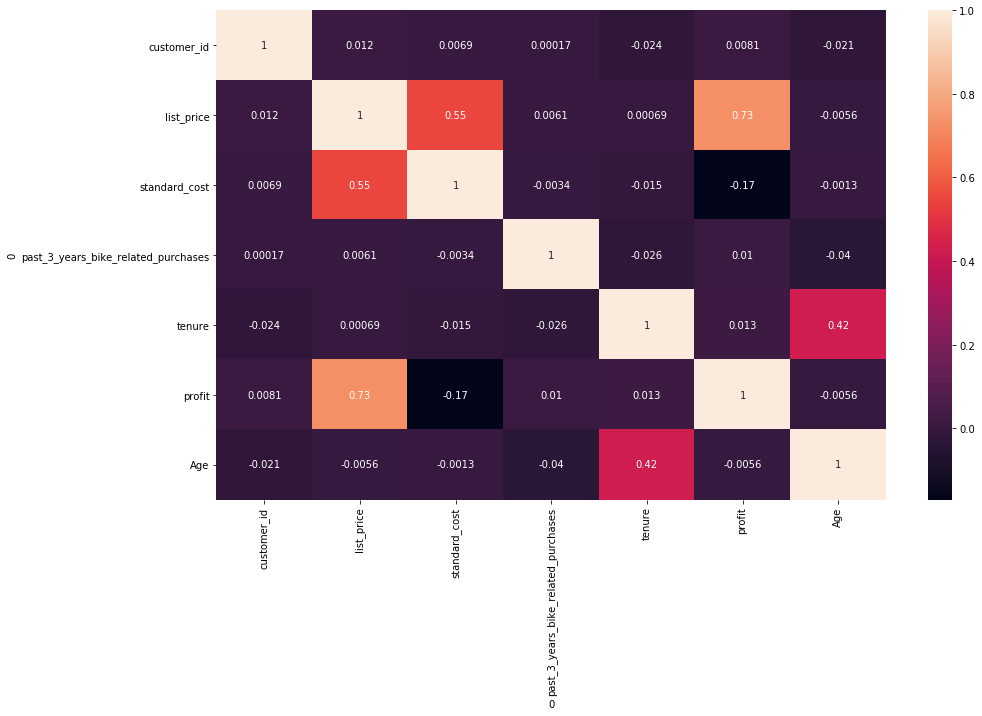

In [398]:
plt.figure(figsize = (15, 9))
sns.heatmap(data.corr(), annot = True)

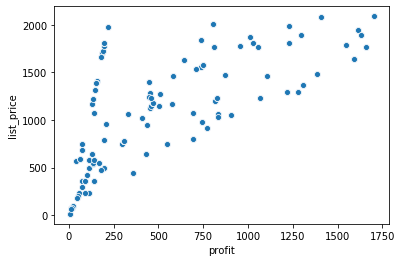

In [399]:
#profit vs list price
sns.scatterplot(x = 'profit', y = 'list_price', data = data)

In [400]:
print(data['profit'].corr(data['list_price']))

0.7276961992502561


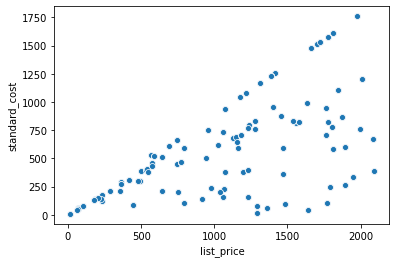

In [401]:
#list price vs standard cost
sns.scatterplot(x= 'list_price', y = 'standard_cost', data = data)

In [402]:
print(data.standard_cost.corr(data.list_price))

0.5516664808422388


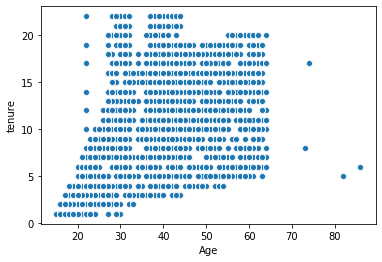

In [403]:
#age vs tenure
sns.scatterplot('Age', 'tenure', data = data)

In [404]:
print(data.Age.corr(data.tenure))

0.42420405554249413


In [405]:
#merging dataframes
final_data = pd.merge_ordered(data, cust_address, on = 'customer_id')

In [406]:
final_data.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,...,wealth_segment,deceased_indicator,owns_car,tenure,profit,Age,address,postcode,state,property_valuation
0,94,86,1.0,2017-12-23,False,Approved,OHM Cycles,Standard,medium,medium,...,Mass Customer,N,Yes,11.0,110.56,64.0,060 Morning Avenue,2016,New South Wales,10
1,3765,38,1.0,2017-04-06,True,Approved,Solex,Standard,medium,medium,...,Mass Customer,N,Yes,11.0,751.02,64.0,060 Morning Avenue,2016,New South Wales,10
2,5157,47,1.0,2017-05-11,True,Approved,Trek Bicycles,Road,low,small,...,Mass Customer,N,Yes,11.0,189.28,64.0,060 Morning Avenue,2016,New South Wales,10
3,9785,72,1.0,2017-01-05,False,Approved,Norco Bicycles,Standard,medium,medium,...,Mass Customer,N,Yes,11.0,90.10,64.0,060 Morning Avenue,2016,New South Wales,10
4,13424,2,1.0,2017-02-21,False,Approved,Solex,Standard,medium,medium,...,Mass Customer,N,Yes,11.0,17.87,64.0,060 Morning Avenue,2016,New South Wales,10


In [407]:
final_data.drop(columns = ['address', 'postcode', 'property_valuation'], inplace = True)

In [408]:
final_data.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,...,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,profit,Age,state
0,94,86,1.0,2017-12-23,False,Approved,OHM Cycles,Standard,medium,medium,...,1953-10-12,Executive Secretary,Health,Mass Customer,N,Yes,11.0,110.56,64.0,New South Wales
1,3765,38,1.0,2017-04-06,True,Approved,Solex,Standard,medium,medium,...,1953-10-12,Executive Secretary,Health,Mass Customer,N,Yes,11.0,751.02,64.0,New South Wales
2,5157,47,1.0,2017-05-11,True,Approved,Trek Bicycles,Road,low,small,...,1953-10-12,Executive Secretary,Health,Mass Customer,N,Yes,11.0,189.28,64.0,New South Wales
3,9785,72,1.0,2017-01-05,False,Approved,Norco Bicycles,Standard,medium,medium,...,1953-10-12,Executive Secretary,Health,Mass Customer,N,Yes,11.0,90.10,64.0,New South Wales
4,13424,2,1.0,2017-02-21,False,Approved,Solex,Standard,medium,medium,...,1953-10-12,Executive Secretary,Health,Mass Customer,N,Yes,11.0,17.87,64.0,New South Wales


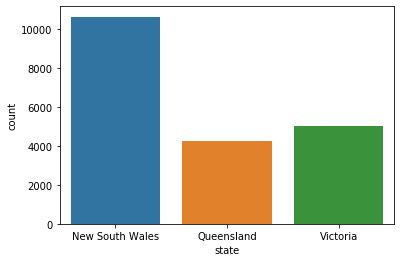

In [409]:
#state with highest number of customers
sns.countplot(final_data['state'])

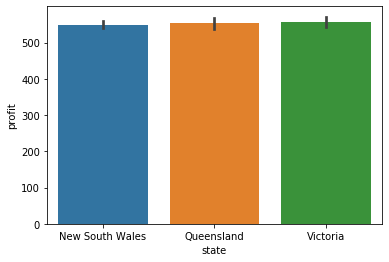

In [410]:
#state vs profit
sns.barplot(data = final_data, x = 'state', y = 'profit')

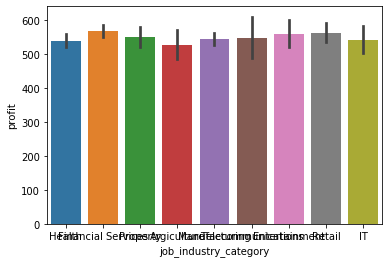

In [411]:
#job industry category vs profit
sns.barplot(data = final_data, x = 'job_industry_category', y = 'profit')

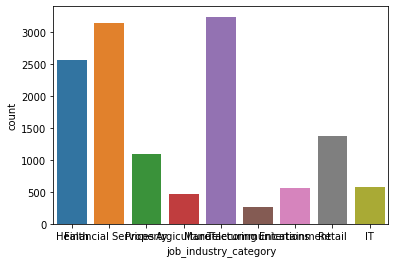

In [412]:
#job category with highest number of customers
sns.countplot(final_data['job_industry_category'])

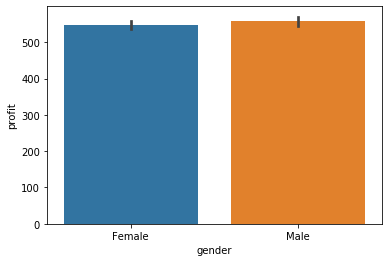

In [413]:
#profit by gender
sns.barplot(x = 'gender', y = 'profit', data = final_data)

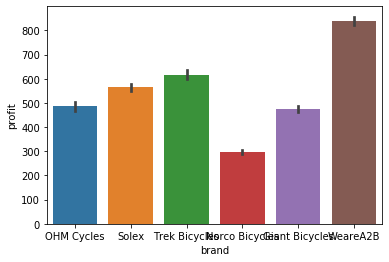

In [414]:
#profit by brand
sns.barplot(x = 'brand', y = 'profit', data = final_data)

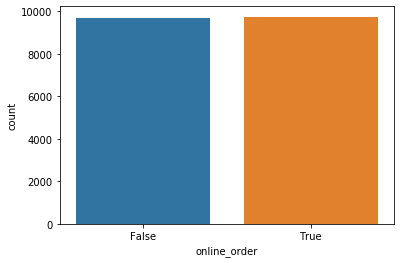

In [415]:
#profit from online and offline orders
sns.countplot(final_data['online_order'])

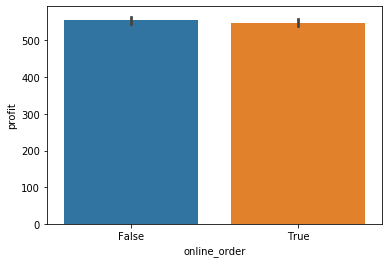

In [416]:
sns.barplot(data = final_data, x = 'online_order', y = 'profit')

In [417]:
final_data.isna().sum()

0
transaction_id                          512
product_id                              512
customer_id                               0
transaction_date                        512
online_order                            512
order_status                            512
brand                                   512
product_line                            512
product_class                           512
product_size                            512
list_price                              512
standard_cost                           512
product_first_sold_date                 512
first_name                             6674
last_name                              6674
gender                                 6674
past_3_years_bike_related_purchases    6674
DOB                                    6674
job_title                              6674
job_industry_category                  6674
wealth_segment                         6674
deceased_indicator                     6674
owns_car                      

In [418]:
final_data.shape

(19957, 27)

In [419]:
overall_data = final_data.dropna()

In [420]:
overall_data.isna().sum()

0
transaction_id                         0
product_id                             0
customer_id                            0
transaction_date                       0
online_order                           0
order_status                           0
brand                                  0
product_line                           0
product_class                          0
product_size                           0
list_price                             0
standard_cost                          0
product_first_sold_date                0
first_name                             0
last_name                              0
gender                                 0
past_3_years_bike_related_purchases    0
DOB                                    0
job_title                              0
job_industry_category                  0
wealth_segment                         0
deceased_indicator                     0
owns_car                               0
tenure                                 0
profit        

In [421]:
overall_data['Age'] = overall_data['Age'].astype('int')
overall_data['Age'].head()

C:\Users\LENOVO\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


0    64
1    64
2    64
3    64
4    64
Name: Age, dtype: int32

In [422]:
print('Minimum age is ', overall_data['Age'].min())
print('Maximum age is ', overall_data['Age'].max())

Minimum age is  15
Maximum age is  86


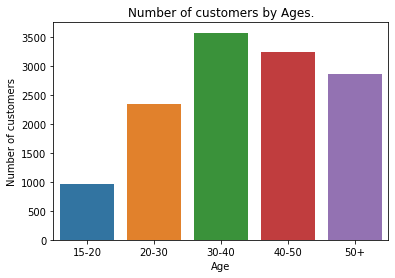

In [423]:
age_15_20 = overall_data[(overall_data.Age >= 15) & (overall_data.Age <= 20)]
age_20_30 = overall_data[(overall_data.Age > 20 ) & (overall_data.Age <= 30)]
age_30_40 = overall_data[(overall_data.Age > 30) & (overall_data.Age <= 40)]
age_40_50 = overall_data[(overall_data.Age > 40) & (overall_data.Age <= 50)]
age_above_50 = overall_data[overall_data.Age > 50]

agex = ['15-20', '20-30', '30-40', '40-50', '50+']
agey = [len(age_15_20.values), len(age_20_30.values), len(age_30_40.values),
        len(age_40_50.values), len(age_above_50.values)]

sns.barplot(x = agex, y = agey)
plt.title('Number of customers by Ages.')
plt.xlabel('Age')
plt.ylabel('Number of customers')
plt.show()

In [424]:
overall_data.columns

Index(['transaction_id', 'product_id', 'customer_id', 'transaction_date',
       'online_order', 'order_status', 'brand', 'product_line',
       'product_class', 'product_size', 'list_price', 'standard_cost',
       'product_first_sold_date', 'first_name', 'last_name', 'gender',
       'past_3_years_bike_related_purchases', 'DOB', 'job_title',
       'job_industry_category', 'wealth_segment', 'deceased_indicator',
       'owns_car', 'tenure', 'profit', 'Age', 'state'],
      dtype='object', name=0)

In [425]:
overall_data.drop(columns = ['transaction_id', 'product_id', 'customer_id', 
                                           'transaction_date', 'online_order', 'order_status',
                                           'standard_cost', 'product_first_sold_date', 'first_name',
                                           'last_name', 'gender', 'past_3_years_bike_related_purchases',
                                           'DOB', 'job_title', 'deceased_indicator', 'owns_car', 'profit',
                                           'state'
                                          ], inplace = True)

C:\Users\LENOVO\anaconda3\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [426]:
overall_data.head()

,brand,product_line,product_class,product_size,list_price,job_industry_category,wealth_segment,tenure,Age
0,OHM Cycles,Standard,medium,medium,235.63,Health,Mass Customer,11.0,64
1,Solex,Standard,medium,medium,1577.53,Health,Mass Customer,11.0,64
2,Trek Bicycles,Road,low,small,1720.70,Health,Mass Customer,11.0,64
3,Norco Bicycles,Standard,medium,medium,360.40,Health,Mass Customer,11.0,64
4,Solex,Standard,medium,medium,71.49,Health,Mass Customer,11.0,64


In [427]:
# Label encoding with scikit-learn
from sklearn.preprocessing import LabelEncoder

In [428]:
le = LabelEncoder()
overall_data['brand'] = le.fit_transform(overall_data['brand'])
overall_data['job_industry_category'] = le.fit_transform(overall_data['job_industry_category'])
overall_data['product_size'] = le.fit_transform(overall_data['product_size'])
overall_data['product_line'] = le.fit_transform(overall_data['product_line'])
overall_data['product_class'] = le.fit_transform(overall_data['product_class'])
overall_data['wealth_segment'] = le.fit_transform(overall_data['wealth_segment'])

C:\Users\LENOVO\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\LENOVO\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\LENOVO\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] 

In [429]:
#extracting features
features = ['brand', 'product_line', 'product_class', 'product_size', 'list_price', 'tenure', 'Age',
            'wealth_segment', 'job_industry_category']

#converting features to numpy array
X = overall_data[features].values

In [430]:
#importing model
from sklearn.cluster import KMeans

In [431]:
#initializing model
k_model = KMeans(n_clusters = 3, random_state = 0)

In [432]:
#fit model
k_model.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

In [433]:
#predict cluster labels for each customer
labels = k_model.predict(X)

In [434]:
#adding labels to data
overall_data['cluster'] = labels

C:\Users\LENOVO\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [435]:
#checking model accuracy
from sklearn.metrics import silhouette_score
silhouette_score = silhouette_score(X, labels)
print(silhouette_score)

0.6331526732750176


In [436]:
#analyze cluster segment
cluster_stats = overall_data.groupby('cluster').mean()
print(cluster_stats)

0           brand  product_line  product_class  product_size   list_price  \
cluster                                                                     
0        2.363990      1.611615       1.515976      1.012953   441.905730   
1        2.597375      1.960835       1.471272      0.993544  1209.177740   
2        2.663777      1.892441       1.656462      0.801409  1820.047434   

0        job_industry_category  wealth_segment     tenure        Age  
cluster                                                               
0                     3.865717        1.251079  10.695596  39.781520  
1                     3.838821        1.229826  10.806327  39.970734  
2                     3.885939        1.238418  10.713899  39.654294  


##### Choosing optimal hyperparameter

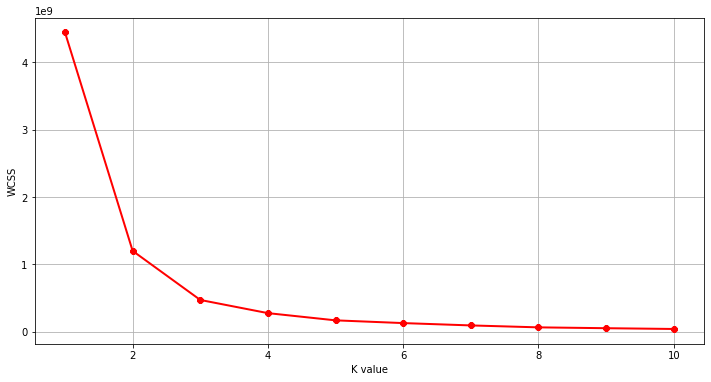

In [437]:
wcss = []
for k in range(1,11):
    kmeans = KMeans(n_clusters = k, init = 'k-means++')
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.figure(figsize = (12, 6))
plt.grid()
plt.plot(range(1,11), wcss, linewidth = 2, color = 'red', marker = '8')
plt.xlabel('K value')
plt.ylabel('WCSS')
plt.show()

In [438]:
print(k_model.cluster_centers_)

[[2.36398964e+00 1.61161485e+00 1.51597582e+00 1.01295337e+00
  4.41905730e+02 1.06955959e+01 3.97815199e+01 1.25107945e+00
  3.86571675e+00]
 [2.59737465e+00 1.96083495e+00 1.47127179e+00 9.93544222e-01
  1.20917774e+03 1.08063267e+01 3.99707338e+01 1.22982569e+00
  3.83882074e+00]
 [2.66377675e+00 1.89244107e+00 1.65646166e+00 8.01408832e-01
  1.82004743e+03 1.07138987e+01 3.96542942e+01 1.23841777e+00
  3.88593877e+00]]


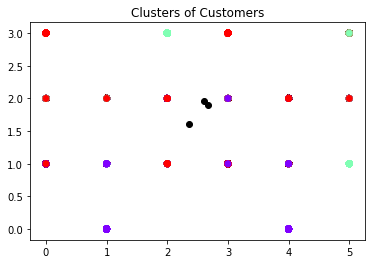

In [439]:
plt.scatter(X[:,0], X[:,1], c = k_model.labels_, cmap = 'rainbow')
plt.scatter(k_model.cluster_centers_[:,0], k_model.cluster_centers_[:,1], color = 'black')
plt.title('Clusters of Customers')
plt.show()